In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/flights_dataset.csv')
df = df.drop(df.columns[0], axis=1)

In [7]:
df.head()

airline  source_city  departure_time  stops  arrival_time  \
0        4            2               2      2             5   
1        4            2               1      2             4   
2        0            2               1      2             1   
3        5            2               4      2             0   
4        5            2               4      2             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1   5953  
1                 5      1      2.33          1   5953  
2                 5      1      2.17          1   5956  
3                 5      1      2.25          1   5955  
4                 5      1      2.33          1   5955

In [6]:
flight_general_info = LabelEncoder()
stops = LabelEncoder()
classes = LabelEncoder()

df['airline']=flight_general_info.fit_transform(df['airline'])
df['source_city']=flight_general_info.fit_transform(df['source_city'])
df['destination_city']=flight_general_info.fit_transform(df['destination_city'])
df['departure_time']=flight_general_info.fit_transform(df['departure_time'])
df['arrival_time']=flight_general_info.fit_transform(df['arrival_time'])

df['stops']=stops.fit_transform(df['stops'])

df['class']=classes.fit_transform(df['class'])

df.drop(['flight'],axis=1,inplace=True)

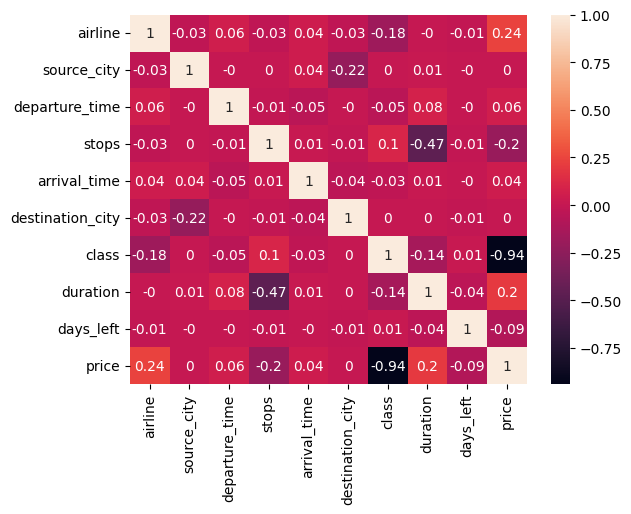

<Figure size 2000x2000 with 0 Axes>

In [9]:
sns.heatmap(df.corr().round(2),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [14]:
features = df.drop(['price'],axis=1).values
y = df.price.values

scaler = MinMaxScaler().fit_transform(features)
X = pd.DataFrame(scaler)
display(X)

0    1    2    3    4    5    6         7    8
0       0.8  0.4  0.4  1.0  1.0  1.0  1.0  0.027347  0.0
1       0.8  0.4  0.2  1.0  0.8  1.0  1.0  0.030612  0.0
2       0.0  0.4  0.2  1.0  0.2  1.0  1.0  0.027347  0.0
3       1.0  0.4  0.8  1.0  0.0  1.0  1.0  0.028980  0.0
4       1.0  0.4  0.8  1.0  0.8  1.0  1.0  0.030612  0.0
...     ...  ...  ...  ...  ...  ...  ...       ...  ...
300148  1.0  0.2  0.8  0.0  0.4  0.6  0.0  0.188776  1.0
300149  1.0  0.2  0.0  0.0  1.0  0.6  0.0  0.195714  1.0
300150  1.0  0.2  0.2  0.0  1.0  0.6  0.0  0.265306  1.0
300151  1.0  0.2  0.2  0.0  0.4  0.6  0.0  0.187143  1.0
300152  1.0  0.2  0.8  0.0  0.4  0.6  0.0  0.188776  1.0

[300153 rows x 9 columns]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240122, 9) (60031, 9) (240122, 1) (60031, 1)


In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error and R squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN: MSE:", mse)
print("KNN: R Squared:", r2)

KNN: MSE: 14667409.698580401
KNN: R Squared: 0.9715462384437925


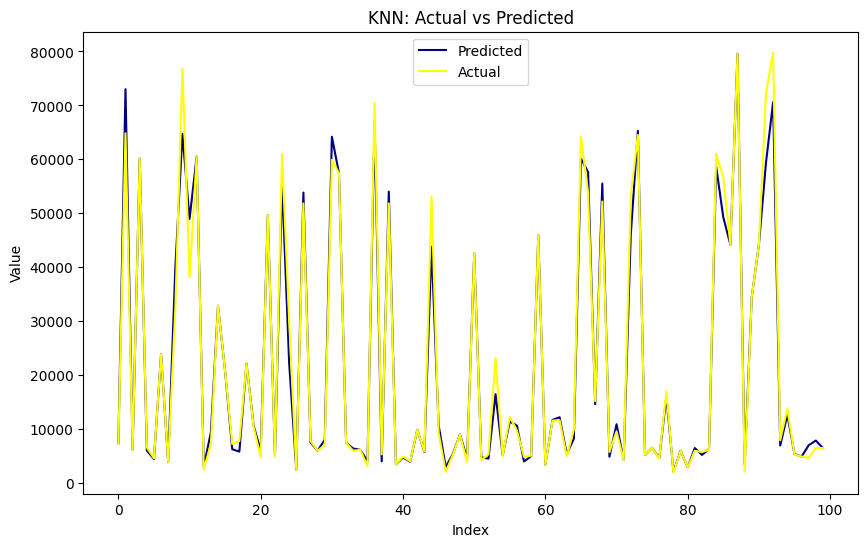

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[0:100], label='Predicted', color='navy')
plt.plot(y_test[0:100], label='Actual', color='yellow')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('KNN: Actual vs Predicted')
plt.legend()
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Reg: MSE:", mse)
print("Linear Reg: R Squared:", r2)

Linear Reg: MSE: 49200540.293721996
Linear Reg: R Squared: 0.904554350718816


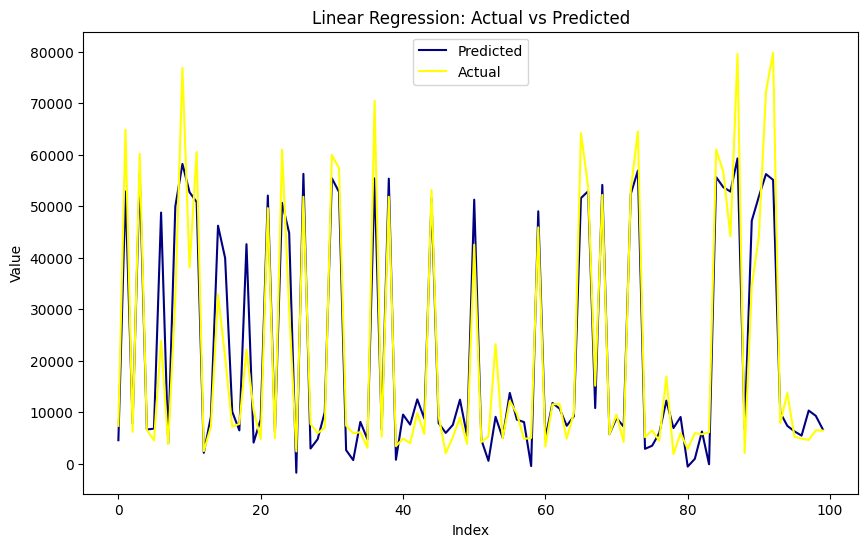

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[0:100], label='Predicted', color='navy')
plt.plot(y_test[0:100], label='Actual', color='yellow')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [29]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 15.0])
model.fit(X_train, y_train)

# Get the best alpha parameter
best_alpha = model.alpha_
print("Best alpha:", best_alpha)

y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ridge Reg: MSE:", mse)
print("Ridge Reg: R Squared:", r2)

Best alpha: 1.0
Ridge Reg: MSE: 49200530.30227388
Ridge Reg: R Squared: 0.904554370101535


We got almost the same results as the Linear Regression

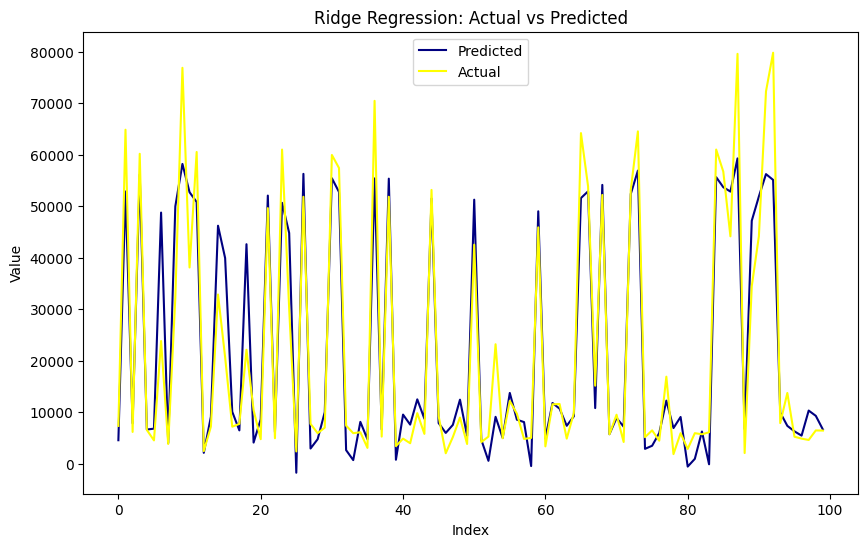

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[0:100], label='Predicted', color='navy')
plt.plot(y_test[0:100], label='Actual', color='yellow')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()